In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import random, sys
sys.path.insert(0, '../scripts')
from lib import make_corrfig, linearize, get_flat_inds_for_net, triangularizeweights
from data_loader import data_loader
import warnings
warnings.simplefilter('ignore')

In [15]:
ls ../results/loocv_results/

cv_fold_importance1500.csv  scores1500.csv
cv_fold_importance3000.csv  scores3000.csv
cv_fold_importance500.csv   scores500.csv


In [25]:
scores500 = np.loadtxt('../results/loocv_results/scores500.csv', delimiter=',')
scores1500 = np.loadtxt('../results/loocv_results/scores1500.csv', delimiter=',')
scores3000 = np.loadtxt('../results/loocv_results/scores3000.csv', delimiter=',')

cv_fold_importance500 = np.loadtxt('../results/loocv_results/cv_fold_importance500.csv', delimiter=',')
cv_fold_importance1500 = np.loadtxt('../results/loocv_results/cv_fold_importance1500.csv', delimiter=',')
cv_fold_importance3000 = np.loadtxt('../results/loocv_results/cv_fold_importance3000.csv', delimiter=',')


accuracry with 500 estimators: 0.6515151515151515
accuracry with 1500 estimators: 0.6464646464646465
accuracry with 3000 estimators: 0.6212121212121212


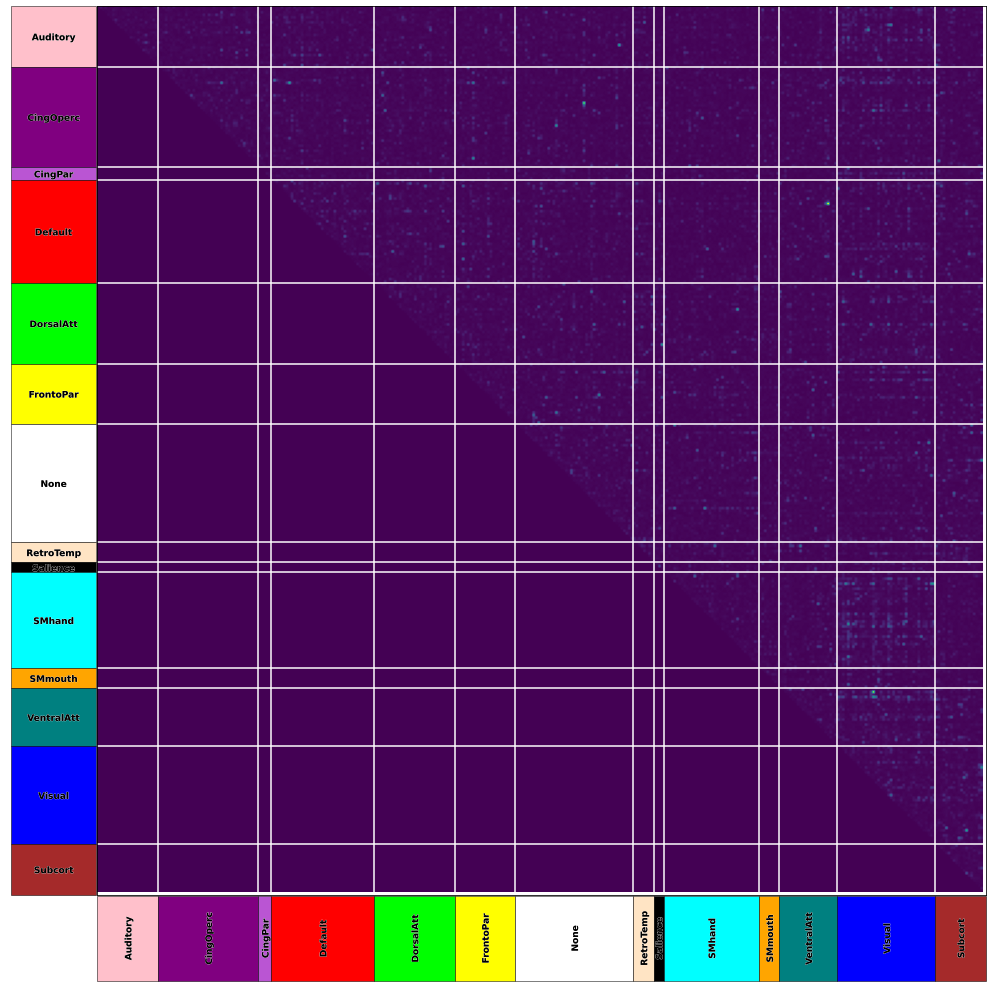

In [30]:
print(f'accuracry with 500 estimators: {np.mean(scores500)}')
print(f'accuracry with 1500 estimators: {np.mean(scores1500)}')
print(f'accuracry with 3000 estimators: {np.mean(scores3000)}')

# Visualize feature importance values overlayed ontop of features / functional connectivity matrix
make_corrfig(triangularizeweights(cv_fold_importance500.mean(0)), weights=True) 
plt.show()

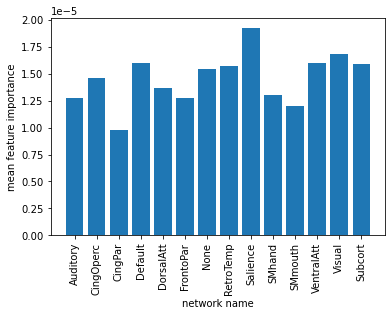

In [28]:
#calculate mean feature importance over different LOOCV folds
mean_feature_importance = cv_fold_importance500.mean(0)

netlist = ['Auditory','CingOperc','CingPar','Default','DorsalAtt','FrontoPar','None', 'RetroTemp','Salience','SMhand','SMmouth','VentralAtt','Visual','Subcort']   

#average features belonging to specific apriori defined funcitonal networks
mean_importance = []
net_size = []
for net in netlist:
    mean_importance.append(np.mean(mean_feature_importance[get_flat_inds_for_net(net, within=True)]))
    net_size.append(len(get_flat_inds_for_net(net, within=True)))

plt.bar(range(len(netlist)), mean_importance, align='center')
plt.xticks(range(len(netlist)), netlist, rotation=90)
plt.ylabel("mean feature importance")
plt.xlabel('network name')
plt.show()